<a href="https://colab.research.google.com/github/mic0331/deep-learning-tensorflow-2/blob/master/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.0.0-beta1


In [0]:
# load the data
from sklearn.datasets import load_breast_cancer

In [0]:
# load the data
data = load_breast_cancer()

In [4]:
# check the type of `data` 
type(data)

sklearn.utils.Bunch

In [5]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [7]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [11]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

W0816 12:24:53.994216 139693613733760 deprecation.py:323] From /tensorflow-2.0.0b1/python3.6/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 2ms/sample - loss: 0.9806 - accuracy: 0.4016 - val_loss: 0.8831 - val_accuracy: 0.4202
Epoch 2/100
381/381 [==============================] - 0s 84us/sample - loss: 0.8893 - accuracy: 0.4383 - val_loss: 0.8031 - val_accuracy: 0.4947
Epoch 3/100
381/381 [==============================] - 0s 91us/sample - loss: 0.8041 - accuracy: 0.5171 - val_loss: 0.7339 - val_accuracy: 0.5904
Epoch 4/100
381/381 [==============================] - 0s 87us/sample - loss: 0.7312 - accuracy: 0.5958 - val_loss: 0.6730 - val_accuracy: 0.6330
Epoch 5/100
381/381 [==============================] - 0s 80us/sample - loss: 0.6698 - accuracy: 0.6483 - val_loss: 0.6191 - val_accuracy: 0.7074
Epoch 6/100
381/381 [==============================] - 0s 81us/sample - loss: 0.6140 - accuracy: 0.6955 - val_loss: 0.5738 - val_accuracy: 0.7287
Epoch 7/100
381/381 [==============================] - 0s 73us/sample - loss: 0

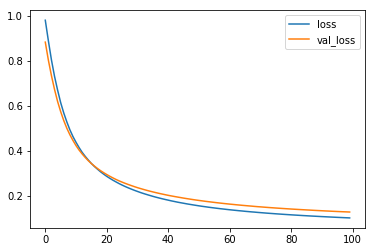

In [16]:
# Evaluate what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

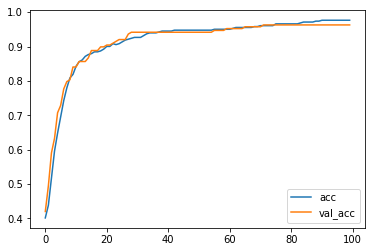

In [17]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()